# Binary Classification with PyTorch 

In this training, we will use PyTorch to build a simple neural network for binary classification. We will use the `torch` and `torchvision` libraries to build and train the model. We will use the `sklearn` library to evaluate the model. 
The outcome of the model will predict if the Total Row score C of a patient is above or below a certain value, in this case we have defined the threshold as 5 e.g. if the Total Row score C is above 5, the outcome is class 1, otherwise it is  class 0.


In [1]:

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import sklearn
import keras
from tensorflow.keras.optimizers.legacy import Adam
from scikeras.wrappers import KerasRegressor
from keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
import torch
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### We then need to define some functions to help with the classification 
We will define the following functions: `pin_update`: this function makes a returns a 1 if the total row score is below 5 or else a 0. \
Then `pin_update1`: This function return a 1 is the total row score is above 5 or else a 0. \
Then we have created `predict_round` which is a function that returns the rounded value of the prediction, and the estimated class

In [2]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 1
    else:
        return 0


def pin_update1(row):
     if 5 < row["Total Row Score C"]:
          return 1
     else:
          return 0 


def predic_func(pred):
    if pred[0] > pred[1]:
        return f"the estimate would be class 1 with a probability of {pred[0]*100}"
    else: 
        return f"The estimate would be class 2 with a probability of {pred[1]*100}"

In [3]:
df = pd.read_csv('Behandlet data-kopi.csv', sep=';', header=0, index_col=0, decimal=',')
df

,Anteroposterior 1.1,Anteroposterior 1.2,Vertical 1.1,Vertical 1.2,Transverse 1,Crowding 1,Spacing 1,Tooth shape/size 1,Pan 1,Anteroposterior 2.1,Anteroposterior 2.2,Vertical 2.1,Vertical 2.2,Transverse 2,Crowding 2,Spacing 2,Tooth shape/size 2,Pan 2,Total Row Score C
1,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,3.0,0
2,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,3.0,9.0,0.0,2.0,4.0,6.0,0.0,0.0,1.0,3.0,8
3,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,9
4,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,4.0,9.0,0.0,2.0,0.0,6.0,4.0,0.0,1.0,4.0,9
5,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,3.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,12.0,0.0,3.0,1.0,6.0,4.0,0.0,1.0,4.0,9.0,0.0,0.0,0.0,6.0,3.0,0.0,1.0,0.0,3
118,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,4.0,9.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,3.0,3
119,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,12.0,0.0,3.0,4.0,6.0,4.0,0.0,0.0,3.0,4
120,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,4.0,9.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,4.0,12


In [4]:
Output = df.apply(pin_update, axis=1)
Output1 = df.apply(pin_update1, axis=1)

df['Output'] = Output
df['Output1'] = Output1


df1 = df[["Anteroposterior 1.1",
          'Anteroposterior 1.2',
          'Vertical 1.1',
          'Vertical 1.2',
          'Transverse 1',
          'Crowding 1',
          'Spacing 1',
          'Tooth shape/size 1',
          'Pan 1',
          'Anteroposterior 2.1',
          'Anteroposterior 2.2',
          'Vertical 2.1',
          'Vertical 2.2',
          'Transverse 2',
          'Crowding 2',
          'Spacing 2',
          'Tooth shape/size 2',
           'Pan 2',
          'Output',
          'Output1']]



df1 = df1.iloc[1:, :]

df1 = df1.dropna()

target_column = ["Output","Output1"]
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)

We then normalized data to have $MEAN = 0$ and $STD = 1$ using the `Normalization` from `keras` library. We do this to ensure that the model trains faster and better. And tell the neural network what it´s target columns are.


## training



In [5]:
no_classes = 3
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5
batch_size = 64
acc_per_fold = []
loss_per_fold = []
fold_no = 1

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df1, output_rows, test_size=0.25,shuffle=True)


inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

In [7]:
for train, test in kfold.split(inputs, targets):
    model = Sequential()
    
    model.add(Dense(18, input_dim=18, activation='relu'))

    model.add(Dense(8,activation='relu'))

    model.add(Dense(2, activation='softmax'))

 # Compile model
    model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

     # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] *100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1
    
fold_no = 1 

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

2024-05-30 17:59:17.226442: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-30 17:59:17.226541: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-30 17:59:17.226555: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-30 17:59:17.226740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-30 17:59:17.227050: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10


2024-05-30 17:59:18.392210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step - loss: 0.7761 - accuracy: 0.4348
Epoch 2/10
2/2 [==============================] - 0s 15ms/step - loss: 0.7728 - accuracy: 0.4348
Epoch 3/10
2/2 [==============================] - 0s 15ms/step - loss: 0.7694 - accuracy: 0.4348
Epoch 4/10
2/2 [==============================] - 0s 17ms/step - loss: 0.7664 - accuracy: 0.4348
Epoch 5/10
2/2 [==============================] - 0s 13ms/step - loss: 0.7633 - accuracy: 0.4348
Epoch 6/10
2/2 [==============================] - 0s 16ms/step - loss: 0.7610 - accuracy: 0.4239
Epoch 7/10
2/2 [==============================] - 0s 13ms/step - loss: 0.7581 - accuracy: 0.4239
Epoch 8/10
2/2 [==============================] - 0s 16ms/step - loss: 0.7560 - accuracy: 0.4348
Epoch 9/10
2/2 [==============================] - 0s 17ms/step - loss: 0.7532 - accuracy: 0.4348
Epoch 10/10
2/2 [==============================] - 0s 14ms/step - loss: 0.7510 - accuracy: 0.4348
Score for fold 1: loss of 0.74497985839843

4/4 [==============================] - 0s 66ms/step


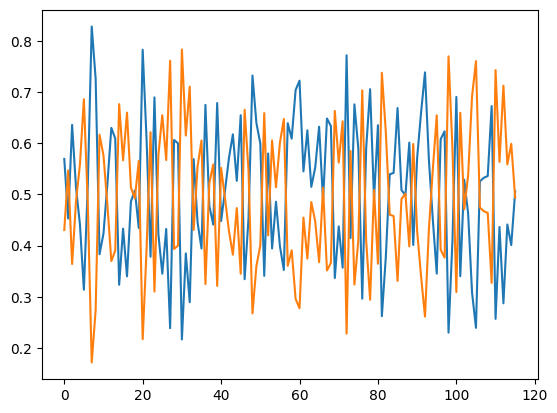

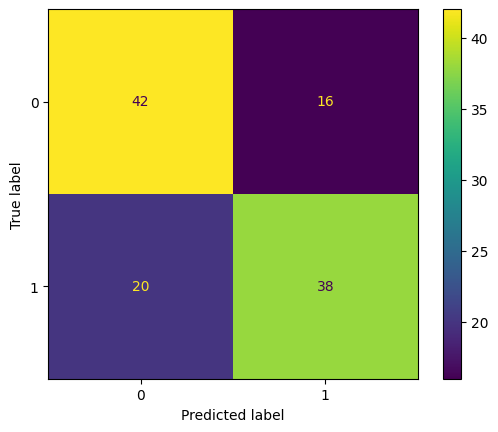

In [8]:


predicted = model.predict(df1)
tensor = torch.tensor(output_rows.values)
predic = tf.squeeze(predicted)


plt.plot(predic)

predict= np.array([np.argmax(row) for row in predic])
actual = np.array([np.argmax(row) for row in tensor])
conf_mat = confusion_matrix(actual, predict)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

Here `xnes` is a bad results which the network predicts fairly okay, but given a good result the network does not perform well.

In [9]:

xnew = np.array([[12,0,0,0,8,2,0,1,2],
                 [12,2,0,4,8,3,0,0,1]])

xnew1 = np.array([[9,0,1,3,6,3,0,0,4],
                 [0,0,0,3,0,0,3,0,4]])





new_prediction = model.predict_on_batch(xnew.reshape(1,18))
new_prediction = tf.squeeze(new_prediction)

new_prediction1 = model.predict_on_batch(xnew1.reshape(1,18))
new_prediction1 = tf.squeeze(new_prediction1)

print(new_prediction)
print(new_prediction1)

tf.Tensor([1.7620947e-05 9.9998236e-01], shape=(2,), dtype=float32)
tf.Tensor([0.83660555 0.1633944 ], shape=(2,), dtype=float32)


In [10]:
print(f"Prediction of a bad result: {predic_func(new_prediction)}")
print(f"Prediction of a good result: {predic_func(new_prediction1)}")

Prediction of a bad result: The estimate would be class 2 with a probability of 99.99823760986328
Prediction of a good result: the estimate would be class 1 with a probability of 83.66055297851562


Here is the estimation from the neural network on a bad and good results, and it is quite clear that its prediction is not good, since it predicts that the "good" results is also bad.